# Practical 1: describing and representing data

Starting with the ‘Basics’

This week is focussed on ensuring that you’re able to access the
teaching materials and to run Jupyter notebooks locally, as well as
describing a dataset in Python.

## Learning Outcomes

-   You have familiarised yourself with how to access the lecture notes
    and Python notebook of this module.
-   You have familiarised yourself with running the Python notebooks
    locally.
-   You have familiarised yourself with describing a dataset in Python.

# Starting the Practical

The process for every week will be the same: download the notebook to
your `QM` folder, switch over to `JupyterLab` (which will be running in
Podman/Docker) and get to work. If you want to save the completed
notebook to your Github repo, you can `add`, `commit`, and `push` the
notebook in Git after you download it. When you’re done for the day,
save your changes to the file (This is very important!), then `add`,
`commit`, and `push` your work to save the completed notebook.

> **Note**
>
> Suggestions for a Better Learning Experience:
>
> -   **Set your operating system and software language to English**:
>     this will make it easier to follow tutorials, search for solutions
>     online, and understand error messages.
>
> -   **Save all files to a cloud storage service**: use platforms like
>     Google Drive, OneDrive, Dropbox, or Git to ensure your work is
>     backed up and can be restored easily when the laptop gets stolen
>     or broken.
>
> -   **Avoid whitespace in file names and column names in datasets**

## Set up the tools

Please follow [the Setup page of
CASA0013](https://jreades.github.io/fsds/setup/) to install and
configure the computing platform, and [this
page](https://jreades.github.io/fsds/sessions/week1.html) to get started
on using the container & JupyterLab.

## Download the Notebook

So for this week, visit the [Week 1 of QM
page](https://huanfachen.github.io/QM/sessions/week1.html#practical),
you’ll see that there is a ‘preview’ link and a a ‘download’ link. If
you click the `preview` link you will be taken to the GitHub page for
the notebook where it has been ‘rendered’ as a web page, which is not
editable. To make the notebook useable on *your* computer, you need to
`download` the IPYNB file.

So now:

1.  Click on the `Download` link.
2.  The file should download automatically, but *if* you see a page of
    raw code, select `File` then `Save Page As...`.
3.  Make sure you know where to find the file (e.g. Downloads or
    Desktop).
4.  Move the file to your Git repository folder
    (e.g. `~/Documents/CASA/QM/`)
5.  Check to see if your browser has added `.txt` to the file name:
    -   If no, then you can move to adding the file.
    -   If yes, then you can either fix the name in the Finder/Windows
        Explore, or you can do this in the Terminal using
        `mv <name_of_practical>.ipynb.txt <name_of_practical>.ipynb`
        (you can even do this in JupyterLab’s terminal if it’s already
        running).

## Running notebooks on JupyterLab

I am assuming that most of you are already running JupyterLab via Podman
using the command.

If you are a bit confused with *container*, *JupyterLab*, *terminal*, or
*Git*, please feel free to ask any questions.

## Loading data

We are going to describe the population of local authorities in the UK.

The data is sourced from [Office for National
Statistics](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/articles/howyourareahaschangedin10yearscensus2021/2022-11-08)
and is donwloadable
[here](https://www.ons.gov.uk/visualisations/censusareachanges/data/mapdatadownload.csv).

We have saved a copy of this dataset to the Github repo, in case that
the dataset is removed from the website.

In [1]:
import pandas as pd

# Read CSV file, skipping first 5 rows, using row 6 as header, and handling comma as thousands separator
df_pop = pd.read_csv(
    'L1_data/UK_census_population.csv',
    skiprows=5,        # Skip first 5 rows. Wnhy?
    thousands=',',     # Interpret commas as thousands separators
    header=0           # After skipping, the first row becomes the header
)

print(df_pop.head())

   Area code          Area name Area type  Population 2011  Population 2021  \
0  K04000001  England and Wales  National       56075912.0       59597542.0   
1  E92000001            England   Country       53012456.0       56490048.0   
2  W92000004              Wales   Country        3063456.0        3107494.0   
3  E12000001         North East    Region        2596886.0        2647013.0   
4  E12000002         North West    Region        7052177.0        7417397.0   

   Percentage change  
0                6.3  
1                6.6  
2                1.4  
3                1.9  
4                5.2  

You might wonder why skipping the first 5 rows and setting
*thousands=‘,’*. I learnt this after opening this csv file in a text
editor and lots of trial-and-errors.

![](https://huanfachen.github.io/QM/sessions/L1_images/uk_pop_csv_screenshot.jpg)

Then, we printed the first few rows of this dataset using
*df_pop.head()*.

## Describing the dataframe

### Which columns are included?

In [2]:
list(df_pop.columns)

['Area code',
 'Area name',
 'Area type',
 'Population 2011',
 'Population 2021',
 'Percentage change']

It is a pain to deal with whitespaces in a column, so good practice is
to replace the whitespaces (eg tabs, multiple spaces) within column
names with *underscore*.

In [3]:
df_pop.columns = df_pop.columns.str.replace(r'\s+', '_', regex=True)
print(list(df_pop.columns)) # check again

['Area_code', 'Area_name', 'Area_type', 'Population_2011', 'Population_2021', 'Percentage_change']

### How many rows & cols are included?

In [4]:
rows, cols = df_pop.shape
print(f"Rows: {rows}, Columns: {cols}")

Rows: 369, Columns: 6

### Geography matters

This dataset contains multiple geographies of UK and different
geographies are incomparable. We can check the *Area_type* column:

In [5]:
print(df_pop.Area_type.value_counts())

Local Authority    355
Region               9
Country              2
National             1
Name: Area_type, dtype: int64

So there are 355 records of *Local Authority*， 9 records of *Region*, 2
of *Country*, and 1 of ‘National’. For an introduction to these terms,
see [this article on
ONS](https://www.ons.gov.uk/methodology/geography/ukgeographies/administrativegeography/england).

We will focus on the local authorities, so we apply a filter:

In [6]:
df_pop_la = df_pop[df_pop['Area_type'] == 'Local Authority']

### Overview of the columns

There are two pandas functions that give overview of a dataframe. -
`info()`: shows column data types, non‑null counts, and memory usage. -
`describe()`: shows summary statistics for numeric data (count, mean,
std, min, quartiles, max) - `describe(include='all')`: for both numeric
data and non‑numeric data (count, unique, top value, frequency).

In [7]:
print(df_pop_la.info())
print(df_pop_la.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 12 to 366
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area_code          355 non-null    object 
 1   Area_name          355 non-null    object 
 2   Area_type          355 non-null    object 
 3   Population_2011    355 non-null    float64
 4   Population_2021    355 non-null    float64
 5   Percentage_change  355 non-null    float64
dtypes: float64(3), object(3)
memory usage: 19.4+ KB
None
       Population_2011  Population_2021  Percentage_change
count     3.550000e+02     3.550000e+02         355.000000
mean      2.132867e+05     2.268876e+05           6.070423
std       2.099628e+05     2.245442e+05           4.608338
min       2.203000e+03     2.054000e+03          -9.600000
25%       1.000530e+05     1.055705e+05           2.950000
50%       1.382650e+05     1.477760e+05           5.800000
75%       2.487865e+05     2.628895e+05 

## Describing census 2021 population

Now, we focus on describing the local authority population from census
2021. The first question is, what data type is this variable -
*nominal*, *ordinal*, *interval*, or *ratio*？

> **Note**
>
> The data type of a variable is different from how it’s stored in
> memory. For example, the *Area_type* variable can be encoded for
> convenience as 0 (“national”), 1 (“country”), and 2 (“local
> authority”). Although these are stored as numbers, Area_type is not
> truly numeric data — it’s an *nominal* variable.

Does it make sense to say ‘The population of LA AAA is twice of LA BBB’?
Yes. So, this variable is of *ratio* type.

### max and min

What is the maximum population size in census 2021?

``` {Python}
print("Max population: ", df_pop_la['Population_2021'].max(skipna=True))
```

Which LAs have the maximum population size? *The code above is a bit
complicated*.

In [8]:
print("{} have the maximum population of {}".format(
    ", ".join(df_pop_la.loc[df_pop_la['Population_2021'] == df_pop_la['Population_2021'].max(skipna=True), 'Area_name']), 
    df_pop_la['Population_2021'].max(skipna=True))
    )

Kent have the maximum population of 1576069.0

What it does: - Finds the max population while ignoring NaNs. - Selects
all rows with that population. - Joins their Area_name values into a
comma-separated string.

Two new Python functions here: - *format()*: Inserts variables into a
string by replacing {} placeholders in order with provided arguments. -
*join()*: Combines the elements of an iterable into one string using the
given separator before .join().

Which LAs have the minimum population?

In [9]:
print("{} have the minimum population of {}".format(
    ", ".join(df_pop_la.loc[df_pop_la['Population_2021'] == df_pop_la['Population_2021'].min(skipna=True), 'Area_name']), 
    df_pop_la['Population_2021'].min(skipna=True))
    )

Isles of Scilly have the minimum population of 2054.0

### NA value and outliers?

Are there NA values or outliers in this variable? From results of
`info()`, there are no NA values.

To detect outliers, we will implement the Tukey Fences method using
pandas function, as pandas does not provide a built-in function for this
method.

In [10]:
# Calculate Q1, Q3, and IQR
Q1 = df_pop_la['Population_2021'].quantile(0.25)
Q3 = df_pop_la['Population_2021'].quantile(0.75)
IQR = Q3 - Q1

# Tukey's fences
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df_pop_la[
    (df_pop_la['Population_2021'] < lower_bound) |
    (df_pop_la['Population_2021'] > upper_bound)
]

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("How many outliers?", outliers.shape[0])
print("Outliers:\n", outliers)

Lower bound: -130408.0
Upper bound: 498868.0
How many outliers? 33
Outliers:
      Area_code        Area_name        Area_type  Population_2011  \
56   E06000047    County Durham  Local Authority         513242.0   
60   E06000052         Cornwall  Local Authority         532273.0   
62   E06000054        Wiltshire  Local Authority         470981.0   
68   E06000060  Buckinghamshire  Local Authority         505283.0   
254  E08000003       Manchester  Local Authority         503127.0   
270  E08000019        Sheffield  Local Authority         552698.0   
275  E08000025       Birmingham  Local Authority        1073045.0   
282  E08000032         Bradford  Local Authority         522452.0   
285  E08000035            Leeds  Local Authority         751485.0   
321  E10000003   Cambridgeshire  Local Authority         621210.0   
322  E10000006          Cumbria  Local Authority         499858.0   
323  E10000007       Derbyshire  Local Authority         769686.0   
324  E10000008           

There are 33 outliers in this dataset. Think about the three types of
outliers that we discussed. Which type do these 33 outliers beloong to?

-   **Error Outlier**
-   **Irregular Pattern Outlier**
-   **Influential Outlier**

### Boxplot

To create a boxplot of this variable:

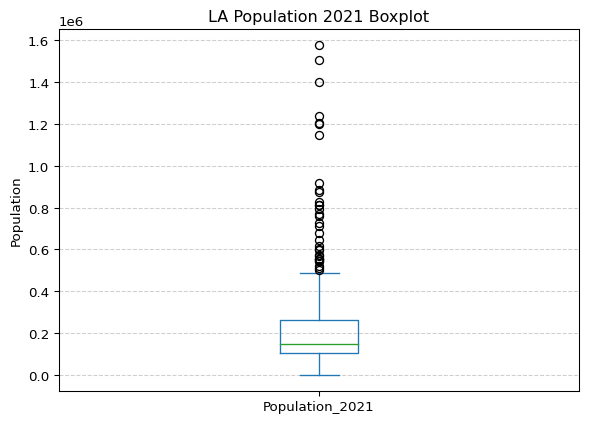

In [11]:
import matplotlib.pyplot as plt

# Create boxplot
df_pop_la['Population_2021'].plot(kind='box', title='LA Population 2021 Boxplot')

plt.ylabel('Population')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

What do you observe from this boxplot? There are lots of values above
the

## Exploring Percentage_change

*Now*, we turn to explore the variable *Percentage_change*, which
represents the relative change from the 2011 census to 2021 census.

Try completing the code below on your own. Practice makes perfect!

### Which LAs experienced the largest population percentage change? To what extent?

#### Question

In [ ]:
print("{} have the largest population percentage change of {}%".format(
    ", ".join(df_pop_la.loc[??['??'] == ??['??'].max(skipna=True), 'Area_name']), 
    df_pop_la['Population_2021'].??(skipna=True))
    )

### Which LAs experienced the smallest population percentage change? To what extent?

#### Question

In [ ]:
print("{} have the smallest population percentage change of {}%".format(
    ", ".??(df_pop_la.loc[df_pop_la[??] == ??['Percentage_change'].??(skipna=True), 'Area_name']), 
    df_pop_la['Percentage_change'].??(skipna=True))
    )

### Make a boxplot of Percentage_change

#### Question

In [ ]:
import matplotlib.pyplot as plt

# Create boxplot
df_pop_la[??].plot(kind=??, title='LA Population Percentage Change Boxplot')

plt.??('Percentage change')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## You’re Done!

Congratulations on completing the first QM practical session! If you are
still working on it, take you time.

Don’t worry about understanding every detail of the Python code — what
matters most is knowing which functions to use for a specific task, like
checking minimum and maximum values or generating boxplots, and knowing
how to debug when it goes wrong. Remember, practice makes perfect.